In [2]:
import numpy as np

In [3]:
lines = open('C:\\Users\\Azaghast\\Downloads\\P-1000000\\P-1000000.txt','r').readlines()

primes = []

for line in range(len(lines)):
    primes.append(lines[line].split(',')[1])

primes = np.asarray((primes),dtype='float64')
print(primes.shape)
print(primes[:20])

(1000000,)
[ 2.  3.  5.  7. 11. 13. 17. 19. 23. 29. 31. 37. 41. 43. 47. 53. 59. 61.
 67. 71.]


In [4]:
primes_log = np.log(primes)
print(primes_log.shape)
print(primes_log[:20])

(1000000,)
[0.69314718 1.09861229 1.60943791 1.94591015 2.39789527 2.56494936
 2.83321334 2.94443898 3.13549422 3.36729583 3.4339872  3.61091791
 3.71357207 3.76120012 3.8501476  3.97029191 4.07753744 4.11087386
 4.20469262 4.26267988]


In [5]:
x = []
y = []

batch_len = 60 #best so far

for i in range(0,len(primes_log)-batch_len):
    x.append(primes_log[i:i+batch_len])
    y.append(primes_log[i+batch_len])

x = np.asarray((x),dtype='float64')
y = np.asarray((y),dtype='float64')


print(x.shape, y.shape,'\n')
print(x[0],'\n')
print(x[-1],'\n')
print(y[0])
print(y[-1])

(999940, 60) (999940,) 

[0.69314718 1.09861229 1.60943791 1.94591015 2.39789527 2.56494936
 2.83321334 2.94443898 3.13549422 3.36729583 3.4339872  3.61091791
 3.71357207 3.76120012 3.8501476  3.97029191 4.07753744 4.11087386
 4.20469262 4.26267988 4.29045944 4.36944785 4.41884061 4.48863637
 4.57471098 4.61512052 4.63472899 4.67282883 4.69134788 4.72738782
 4.84418709 4.87519732 4.91998093 4.93447393 5.00394631 5.01727984
 5.05624581 5.0937502  5.11799381 5.15329159 5.18738581 5.19849703
 5.25227343 5.26269019 5.28320373 5.29330482 5.35185813 5.40717177
 5.42495002 5.433722   5.45103845 5.47646355 5.48479693 5.52545294
 5.54907608 5.57215403 5.59471138 5.60211882 5.62401751 5.63835467] 

[16.55538579 16.55538618 16.55538734 16.55538773 16.55539161 16.55539277
 16.55539393 16.55539471 16.55539664 16.55539806 16.55539858 16.55539897
 16.5554     16.55540091 16.55540116 16.55540129 16.55540168 16.55540246
 16.5554031  16.55540426 16.55540439 16.55540543 16.55540581 16.5554071
 16.5554074

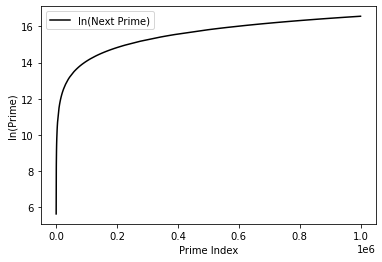

In [6]:
import matplotlib.pyplot as plt

items = [i+1 for i in range(len(y))]

plt.plot(items,y,color='black',label='ln(Next Prime)')
plt.xlabel('Prime Index')
plt.ylabel('ln(Prime)')
plt.legend()
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.0125,random_state=69420)
train_x,val_x,train_y,val_y = train_test_split(train_x,train_y,test_size=0.0125,random_state=69420)

print(train_x.shape,train_y.shape)
print(val_x.shape,val_y.shape)
print(test_x.shape,test_y.shape)

(975097, 60) (975097,)
(12343, 60) (12343,)
(12500, 60) (12500,)


In [8]:
print(train_x[:5],'\n')
print(train_y[:5])

[[16.41086548 16.41086668 16.41086817 16.41086907 16.41086951 16.41087474
  16.41087489 16.41087518 16.41087698 16.41087742 16.41087892 16.41088011
  16.41088324 16.41088369 16.41088518 16.41088548 16.41088742 16.41088966
  16.41088996 16.41089056 16.41089354 16.41089488 16.41089533 16.41089578
  16.41089638 16.41089817 16.41089981 16.41090205 16.41090264 16.41090429
  16.41090757 16.41090846 16.41090936 16.41090981 16.41091369 16.41091503
  16.41091518 16.41091697 16.41091772 16.41091921 16.41092189 16.41092443
  16.41092503 16.41092622 16.41092637 16.41092861 16.41093115 16.41093159
  16.41093219 16.41093294 16.41093339 16.41093667 16.41093712 16.41093756
  16.41093891 16.4109398  16.41094234 16.41094607 16.41094637 16.41094831]
 [15.53056589 15.53057453 15.53057561 15.53057669 15.53057813 15.53057993
  15.53058209 15.53058569 15.53059001 15.53059289 15.53059828 15.53059936
  15.53059972 15.53060728 15.53061016 15.53061052 15.5306134  15.53061592
  15.530617   15.5306224  15.53062456

In [22]:
'''#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import RobustScaler
#from sklearn.preprocessing import MaxAbsScaler
#from sklearn.preprocessing import Normalizer

scaler = Normalizer()
tx_scaled = scaler.fit_transform(train_x)
vx_scaled = scaler.fit_transform(val_x)
tex_scaled = scaler.fit_transform(test_x)

print(np.min(tx_scaled),np.max(tx_scaled))
print(np.min(vx_scaled),np.max(vx_scaled))
print(np.min(tex_scaled),np.max(tex_scaled))'''

'#from sklearn.preprocessing import StandardScaler\n#from sklearn.preprocessing import MinMaxScaler\n#from sklearn.preprocessing import RobustScaler\n#from sklearn.preprocessing import MaxAbsScaler\n#from sklearn.preprocessing import Normalizer\n\nscaler = Normalizer()\ntx_scaled = scaler.fit_transform(train_x)\nvx_scaled = scaler.fit_transform(val_x)\ntex_scaled = scaler.fit_transform(test_x)\n\nprint(np.min(tx_scaled),np.max(tx_scaled))\nprint(np.min(vx_scaled),np.max(vx_scaled))\nprint(np.min(tex_scaled),np.max(tex_scaled))'

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

def compute_train_val_test_loss(model,trnx,trny,valx,valy,tstx,tsty):
    train_pred = model.predict(trnx)
    train_mse, train_mae = mean_squared_error(train_pred,trny), mean_absolute_error(train_pred,trny)
    val_pred = model.predict(valx)
    val_mse, val_mae = mean_squared_error(val_pred,valy), mean_absolute_error(val_pred,valy)
    test_pred = model.predict(tstx)
    test_mse, test_mae = mean_squared_error(test_pred,tsty), mean_absolute_error(test_pred,tsty)
    return [train_mse,train_mae,val_mse,val_mae,test_mse,test_mae]

In [15]:
from sklearn.tree import DecisionTreeRegressor
 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_x,train_y)

#default parameters
# train: mse = 4.854092873573726e-15 | mae = 2.0915432744933205e-08
# val: mse = 2.8974676050941563e-08 | mae = 1.2070882228116168e-05
# test: mse = 3.199805796746213e-08 | mae = 1.1323562149346781e-05

DecisionTreeRegressor()

In [16]:
tree_results = compute_train_val_test_loss(tree_reg,train_x,train_y,val_x,val_y,test_x,test_y)
print(tree_results)

[5.109830825338855e-15, 2.207583099359244e-08, 6.909192252764876e-09, 9.403429366720007e-06, 2.8583197344051477e-08, 1.1734741356648044e-05]


In [20]:
from sklearn.ensemble import RandomForestRegressor #best one so far

rf_reg = RandomForestRegressor(n_jobs=-1)
rf_reg.fit(train_x,train_y)

#default parameters
# train: mse = 1.9384429384367507e-09 | mae = 2.0303021494329557e-06
# val: mse = 5.612622090512762e-09 | mae = 5.516235973658463e-06
# test: mse = 5.98019525900258e-09 | mae = 5.161296261447476e-06

RandomForestRegressor(n_jobs=-1)

In [21]:
rf_results = compute_train_val_test_loss(rf_reg,train_x,train_y,val_x,val_y,test_x,test_y)
print(rf_results)

[1.3317989748004871e-09, 1.9126039427963704e-06, 6.2328189407111e-09, 5.006569460996799e-06, 5.419747359276062e-09, 5.3655437303511635e-06]


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=20,n_estimators=200,learning_rate=0.2)
gbrt.fit(train_x,train_y)

# max_depth=20,n_estimators=200,learning_rate=0.2
# train: mse = 2.7886705771041244e-29 | mae = 4.983273430947665e-15
# val: mse = 8.251987428800342e-08 | mae = 8.815952605326922e-06
# test: mse = 8.815952605326922e-06 | mae = 8.486438306787672e-06

GradientBoostingRegressor(learning_rate=0.2, max_depth=20, n_estimators=200)

In [55]:
gbrt_results = compute_train_val_test_loss(gbrt,train_x,train_y,val_x,val_y,test_x,test_y)
print(gbrt_results)

[2.7886705771041244e-29, 4.983273430947665e-15, 8.251987428800342e-08, 8.815952605326922e-06, 7.540710234944235e-08, 8.486438306787672e-06]


In [69]:
test_batch = np.asarray((primes[40000:40020]),dtype='float64')
print(test_batch,'\n')
test_batch = np.log(test_batch)

for i in test_batch:
    print(i)

print('\n')
test_batch = test_batch.reshape(1,20)
test_batch_pred = rf_reg.predict(test_batch)

for i in test_batch_pred:
    print(i)

print('\n',primes[40021],np.log(primes[40021]))

[479939. 479951. 479953. 479957. 479971. 480013. 480017. 480019. 480023.
 480043. 480047. 480049. 480059. 480061. 480071. 480091. 480101. 480107.
 480113. 480133.] 

13.08141429147497
13.081439294339882
13.081443461423257
13.081451795537914
13.081480964392247
13.08156846585066
13.081576798923585
13.081580965434007
13.081589298402774
13.08163096220506
13.081639294757217
13.081643461007259
13.081664291997106
13.081668458143005
13.081689288612148
13.081730948248758
13.081751777416258
13.081764274708512
13.081776771844584
13.08181842783691


13.081857789282328

 480157.0 13.081868412737315


In [11]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

In [17]:
tx = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
ty = train_y.reshape((train_y.shape[0],1))
vx = val_x.reshape((val_x.shape[0],val_x.shape[1],1))
vy = val_y.reshape((val_y.shape[0],1))

train_dataset = tf.data.Dataset.from_tensor_slices((tx,ty))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(128)
val_dataset = tf.data.Dataset.from_tensor_slices((vx,vy))
val_dataset = val_dataset.shuffle(buffer_size=1024).batch(128)

lstm = keras.Sequential()
lstm.add(keras.layers.LSTM(512,dropout=0.5,input_shape=(train_x.shape[1],1),return_sequences=True))
lstm.add(keras.layers.BatchNormalization())
lstm.add(keras.layers.LeakyReLU())
lstm.add(keras.layers.LSTM(512,dropout=0.5))
lstm.add(keras.layers.BatchNormalization())
lstm.add(keras.layers.LeakyReLU())
lstm.add(keras.layers.Dense(1))

lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 60, 512)           1052672   
_________________________________________________________________
batch_normalization (BatchNo (None, 60, 512)           2048      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 60, 512)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 512)               2099200   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [18]:
lstm.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [19]:
lstm.fit(train_dataset,epochs=5)

Train for 7618 steps
Epoch 1/5
7618/7618 [==============================] - 468s 61ms/step - loss: 1.0078 - mae: 0.3545
Epoch 2/5
1358/7618 [====>.........................] - ETA: 6:21 - loss: 0.0754 - mae: 0.2026

KeyboardInterrupt: 